# Using deep feedforward neural networks to classify images

In [1]:
# load datasets from scikit-learn pre-loaded library 

from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
digits = load_digits()

# explore the data
print(digits)

print(digits['data'])
print(digits['images'])
print(digits['target'])
print(digits['target_names'])

print(type(digits['data']))
print(type(digits['images']))
print(type(digits['target']))
print(type(digits['target_names']))

print(digits['data'].shape)
print(digits['images'].shape)
print(digits['target'].shape)
print(digits['target_names'].shape)

print(digits['data'][0])
print(digits['images'][0])

test1 = digits['data'][0].reshape(8,8)
test2 = digits['images'][0]
np.array_equal(test1, test2)

{'target': array([0, 1, 2, ..., 8, 9, 8]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2., 

True

### The imported data is a dict with four elements, 1. data, 2. image, 3. target, and 4. target_names. 
### 1 and 2 are the same data, just reshaped, representing each image. 
### 3 is the target value for each image. 
### 1, 2, 3 have the same number of observations. 
### 4 is the unique value of 3, only 10 values from number 0 to 9. 

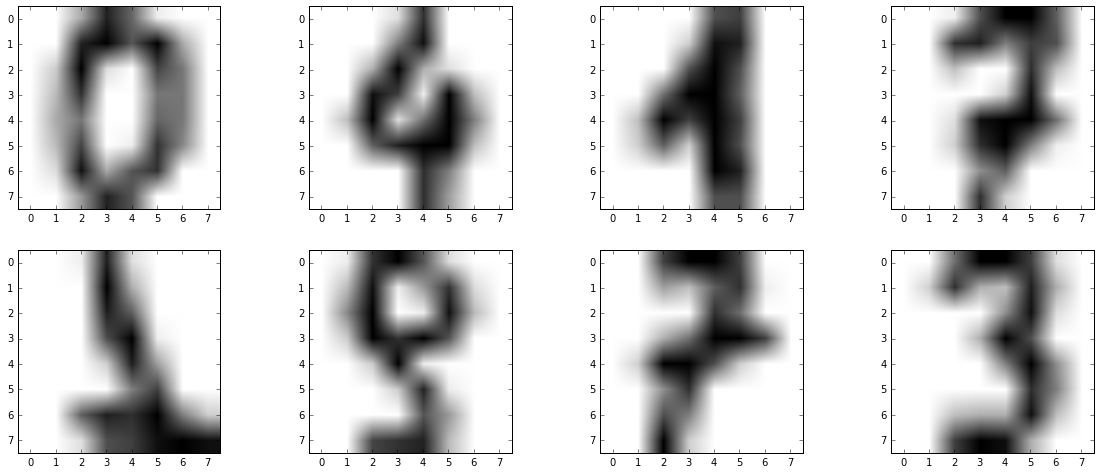

In [2]:
df = pd.DataFrame(digits['data'])
labels = pd.Series(digits['target'])

# display 8 sample rows of the datasets 
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20, 8))
rows = [0, 100, 200, 300, 1000, 1100, 1200, 1300]


for i, row in enumerate(rows):
    image = df.iloc[row]
#    image = image.drop('label', axis=1)
    np_image = image.values.reshape(8,8)
    ax = fig.add_subplot(2,4,i+1)
    plt.imshow(np_image, cmap='gray_r')

## Use K-Nearest Neighbors to train and test the data

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score, KFold

def train(X, y):
    model = KNeighborsClassifier()
    model.fit(X, y)
    return model

def test(model, X):
    predictions = model.predict(X)
    return predictions 
    
def cross_validate(features, target, fold):
    kf = KFold(fold, shuffle=True, random_state=1)
    acu = []
    for train_idx, test_idx in kf.split(features):
        X_train = features.iloc[train_idx]
        X_test = features.iloc[test_idx]
        y_train = target.iloc[train_idx]
        y_test = target.iloc[test_idx]
        model = train(X_train, y_train)
        predictions = test(model, X_test)
        acu.append(accuracy_score(y_test, predictions))
    return np.mean(acu)

# experiment with fold(k) value from 2 to 20
acc = pd.DataFrame()
acc['k value'] = np.arange(2, 21)
for k in range(2, 21):
    acc.loc[acc['k value']==k,'accuracy score'] = cross_validate(df, labels, k)

acc 


,k value,accuracy score
0,2,0.978853
1,3,0.980523
2,4,0.983300
3,5,0.984418
4,6,0.985533
5,7,0.984976
6,8,0.985538
7,9,0.986653
8,10,0.987762
9,11,0.986645


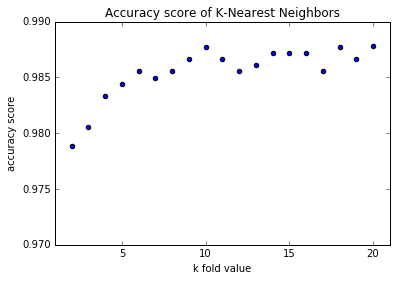

In [6]:
fig = plt.figure(2)
plt.scatter(acc['k value'], acc['accuracy score'])
plt.ylim(0.97, 0.99)
plt.xlim(1, 21)
plt.xlabel('k fold value')
plt.ylabel('accuracy score')
plt.title('Accuracy score of K-Nearest Neighbors')

### Accuracy of the K-Nearest Neighbors prediction converges to between 0.98 and 0.99 with k values after 10

## Use Neural Network with a single hidden layer to train and test the data

In [ ]:
from sklearn.neural_network import MLPClassifier
neurons = [8, 16, 32, 64, 128]

def train(X, y, n):
    model = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic')
    model.fit(X, y)
    return model

def test(model, X):
    predictions = model.predict(X)
    return predictions 
    
def cross_validate(features, target, fold, neuron):
    kf = KFold(fold, shuffle=True, random_state=1)
    acu = []
    for train_idx, test_idx in kf.split(features):
        X_train = features.iloc[train_idx]
        X_test = features.iloc[test_idx]
        y_train = target.iloc[train_idx]
        y_test = target.iloc[test_idx]
        model = train(X_train, y_train, neuron)
        predictions = test(model, X_test)
        acu.append(accuracy_score(y_test, predictions))
    return np.mean(acu)


acc2 = pd.DataFrame()
acc2['neurons'] = neurons
for n in neurons:
    acc2.loc[acc2['neurons']==n,'accuracy score'] = cross_validate(df, labels, 4, n)

acc2 



/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


,neurons,accuracy score
0,8,0.925426
1,16,0.953813
2,32,0.972173
3,64,0.973839
4,128,0.979963


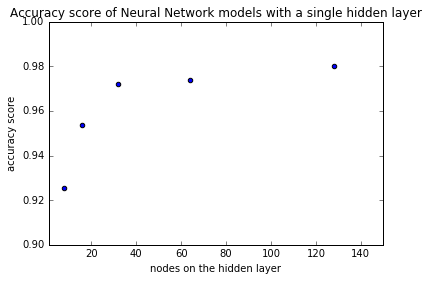

In [12]:
fig = plt.figure(3)
plt.scatter(acc2['neurons'], acc2['accuracy score'])
plt.ylim(0.9, 1)
plt.xlim(1, 150)
plt.xlabel('nodes on the hidden layer')
plt.ylabel('accuracy score')
plt.title('Accuracy score of Neural Network models with a single hidden layer')

## Use Neural Network with two hidden layers to train and test the data

In [ ]:
def train(X, y, n):
    model = MLPClassifier(hidden_layer_sizes=(n,n), activation='logistic')
    model.fit(X, y)
    return model

def test(model, X):
    predictions = model.predict(X)
    return predictions 
    
def cross_validate(features, target, fold, neuron):
    kf = KFold(fold, shuffle=True, random_state=1)
    acu = []
    for train_idx, test_idx in kf.split(features):
        X_train = features.iloc[train_idx]
        X_test = features.iloc[test_idx]
        y_train = target.iloc[train_idx]
        y_test = target.iloc[test_idx]
        model = train(X_train, y_train, neuron)
        predictions = test(model, X_test)
        acu.append(accuracy_score(y_test, predictions))
    return np.mean(acu)



acc3_64 = cross_validate(df, labels, 4, 64)
acc3_128 = cross_validate(df, labels, 4, 128)

print('Two hidden layer with 64 neurons each: accuracy score', acc3_64)
print('Two hidden layer with 128 neurons each: accuracy score', acc3_128)


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Two hidden layer with 64 neurons each: accuracy score 0.9682788913635239
Two hidden layer with 128 neurons each: accuracy score 0.9755097748082159


## Use Neural Network with three hidden layers and 6 fold cross valication to train and test the data

In [ ]:
def train(X, y, n):
    model = MLPClassifier(hidden_layer_sizes=(n,n,n), activation='logistic')
    model.fit(X, y)
    return model

def test(model, X):
    predictions = model.predict(X)
    return predictions 
    
def cross_validate(features, target, fold, neuron):
    kf = KFold(fold, shuffle=True, random_state=1)
    acu = []
    for train_idx, test_idx in kf.split(features):
        X_train = features.iloc[train_idx]
        X_test = features.iloc[test_idx]
        y_train = target.iloc[train_idx]
        y_test = target.iloc[test_idx]
        model = train(X_train, y_train, neuron)
        predictions = test(model, X_test)
        acu.append(accuracy_score(y_test, predictions))
    return np.mean(acu)


acc4_10 = cross_validate(df, labels, 6, 10)
acc4_64 = cross_validate(df, labels, 6, 64)
acc4_128 = cross_validate(df, labels, 6, 128)

print('Three hidden layer with 10 neurons each, 6-fold cross validation: accuracy score', acc4_10)
print('Three hidden layer with 64 neurons each, 6-fold cross validation: accuracy score', acc4_64)
print('Three hidden layer with 128 neurons each, 6-fold cross validation: accuracy score', acc4_128)
